In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Eksplorasi Data**

In [ ]:
!wget https://raw.githubusercontent.com/DimitriBaihaqi/skripsi_covid19_lstm/main/Data_Perhitungan_Manual.csv

--2022-09-30 03:11:53--  https://raw.githubusercontent.com/DimitriBaihaqi/skripsi_covid19_lstm/main/Data_Perhitungan_Manual.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1428 (1.4K) [text/plain]
Saving to: ‘Data_Perhitungan_Manual.csv’

Data_Perhitungan_Ma 100%[===================>]   1.39K  --.-KB/s    in 0s      

2022-09-30 03:11:53 (22.6 MB/s) - ‘Data_Perhitungan_Manual.csv’ saved [1428/1428]



(61, 1)

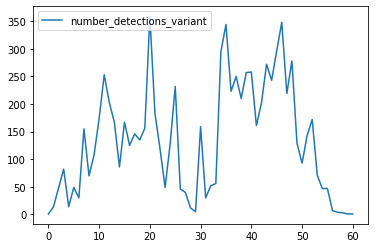

In [ ]:
df = pd.read_csv('Data_Perhitungan_Manual.csv')
weekly_cases = df.drop(axis=1, columns=['country', 'country_code', 'year_week'])
weekly_cases.plot()
weekly_cases.shape

In [ ]:
data = np.array(weekly_cases['number_detections_variant'])
data.resize((len(data), 1))

print(data.shape)
print(len(data))

(61, 1)
61


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        torch.nn.Module.__init__(self)
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x, hidden_cell):
        batch_size = x.size(0)
        lstm_out, hidden_cell = self.lstm(x, hidden_cell)
        lstm_out = lstm_out.view(-1, self.hidden_size)
        print("hidden: ", hidden_cell[0])
        print("cell: ", hidden_cell[1])
        print("lstm: ", lstm_out)
        output = self.linear(lstm_out)
        print("linear: ", output)
        output1 = self.relu(output)
        print("ReLU: ", output1)
        print("")
        return output1, hidden_cell

In [ ]:
weight_manui = torch.Tensor([[-0.869],[0.1884],[0.9281],[0.7717]])
weight_manuh = torch.Tensor([[0.8522],[-0.6006],[-0.5715],[-0.4866]])
bias_manui = torch.Tensor([0.8509,0.6952,-0.2985,-0.0185])
bias_manuh = torch.Tensor([-0.6355,0.5541,0.8215,0.1176])
weight_manulin = torch.Tensor([[-0.2631]])
bias_manulin = torch.Tensor([0.3842])
new_state_dict = OrderedDict({'lstm.weight_ih_l0': weight_manui,'lstm.weight_hh_l0': weight_manuh,'lstm.bias_ih_l0': bias_manui,'lstm.bias_hh_l0': bias_manuh,'linear.weight': weight_manulin,'linear.bias': bias_manulin})

test_lstm = LSTM(input_size=1, hidden_size=1, output_size=1)
test_lstm.load_state_dict(new_state_dict, strict=False)

<All keys matched successfully>

In [ ]:
test_lstm.state_dict()

OrderedDict([('lstm.weight_ih_l0', tensor([[-0.8690],
                      [ 0.1884],
                      [ 0.9281],
                      [ 0.7717]])), ('lstm.weight_hh_l0', tensor([[ 0.8522],
                      [-0.6006],
                      [-0.5715],
                      [-0.4866]])), ('lstm.bias_ih_l0',
              tensor([ 0.8509,  0.6952, -0.2985, -0.0185])), ('lstm.bias_hh_l0',
              tensor([-0.6355,  0.5541,  0.8215,  0.1176])), ('linear.weight',
              tensor([[-0.2631]])), ('linear.bias', tensor([0.3842]))])

In [ ]:
def train(lstm, epoch):
    
    hidden = None
    x_list = []
    pred_list = []
    
    for batch_i, step in enumerate(range(epoch)):
        for i in range(len(data)-1):
            x = data[i] # 60 data pertama
            y = data[i+1] # data terakhir

            x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
            y_tensor = torch.Tensor(y)
            
            prediction, hidden = test_lstm(x_tensor, hidden)

            x_list.append(x)
            pred_list.append(prediction.data.numpy().flatten())


        print('Epoch: ', batch_i)
        plt.plot(range(60), x_list, 'r.') # input
        plt.plot(range(60), pred_list, 'b.') # prediksi
        plt.title('Prediksi LSTM Perhitungan Manual')
        plt.draw() 
        plt.show()
    
    return lstm, x_tensor, y_tensor, prediction

hidden:  tensor([[0.2096]], grad_fn=<SqueezeBackward1>)
cell:  tensor([[0.3066]], grad_fn=<SqueezeBackward1>)
lstm:  tensor([[0.2096]], grad_fn=<ViewBackward0>)
linear:  tensor([[0.3291]], grad_fn=<AddmmBackward0>)
ReLU:  tensor([[0.3291]], grad_fn=<ReluBackward0>)

hidden:  tensor([[0.2909]], grad_fn=<SqueezeBackward1>)
cell:  tensor([[0.2996]], grad_fn=<SqueezeBackward1>)
lstm:  tensor([[0.2909]], grad_fn=<ViewBackward0>)
linear:  tensor([[0.3077]], grad_fn=<AddmmBackward0>)
ReLU:  tensor([[0.3077]], grad_fn=<ReluBackward0>)

hidden:  tensor([[0.2909]], grad_fn=<SqueezeBackward1>)
cell:  tensor([[0.2996]], grad_fn=<SqueezeBackward1>)
lstm:  tensor([[0.2909]], grad_fn=<ViewBackward0>)
linear:  tensor([[0.3077]], grad_fn=<AddmmBackward0>)
ReLU:  tensor([[0.3077]], grad_fn=<ReluBackward0>)

hidden:  tensor([[0.2909]], grad_fn=<SqueezeBackward1>)
cell:  tensor([[0.2996]], grad_fn=<SqueezeBackward1>)
lstm:  tensor([[0.2909]], grad_fn=<ViewBackward0>)
linear:  tensor([[0.3077]], grad_fn=<A

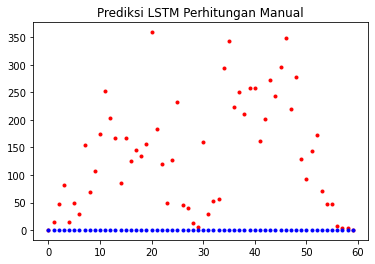

Bobot lama input = [[-0.869 ]
 [ 0.1884]
 [ 0.9281]
 [ 0.7717]]
Bobot lama gate = [[ 0.8522]
 [-0.6006]
 [-0.5715]
 [-0.4866]]
Bias lama input = [ 0.8509  0.6952 -0.2985 -0.0185]
Bias lama gate = [-0.6355  0.5541  0.8215  0.1176]
Bobot linear lama = [[-0.2631]]
Bias linear lama = [0.3842]

MSE:  0.5045247673988342
RMSE:  0.7102990746498108

Gradien Bobot input = [[0.08675885]
 [0.06742103]
 [0.01723033]
 [0.03055204]]
Gradien Bobot gate = [[0.01086099]
 [0.00473115]
 [0.00376524]
 [0.00862822]]
Gradien Bias input = [0.05132365 0.01780597 0.01707927 0.03058925]
Gradien Bias gate = [0.05132365 0.01780597 0.01707927 0.03058925]
Gradien Bobot linear = [[-0.35917547]]
Gradien Bias linear = [-1.]

Bobot baru input = [[-0.8776759 ]
 [ 0.1816579 ]
 [ 0.92637694]
 [ 0.7686448 ]]
Bobot baru gate = [[ 0.85111386]
 [-0.60107315]
 [-0.5718765 ]
 [-0.48746282]]
Bias baru input = [ 0.8457676   0.69341946 -0.30020794 -0.02155893]
Bias baru gate = [-0.6406324   0.5523194   0.8197921   0.11454108]
Bobot

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
trained_lstm, x_tensor, y_tensor, prediction = train(test_lstm, 1)
optimizer = torch.optim.SGD(test_lstm.parameters(), lr=0.1)
criterion = nn.MSELoss() #MSE
loss1 = criterion (prediction, y_tensor) #MSE
loss2 = torch.sqrt(loss1) #RMSE

print('Bobot lama input =', test_lstm.lstm.weight_ih_l0.clone().detach().numpy())
print('Bobot lama gate =', test_lstm.lstm.weight_hh_l0.clone().detach().numpy())
print('Bias lama input =', test_lstm.lstm.bias_ih_l0.clone().detach().numpy())
print('Bias lama gate =', test_lstm.lstm.bias_hh_l0.clone().detach().numpy())
print('Bobot linear lama =', test_lstm.linear.weight.clone().detach().numpy())
print('Bias linear lama =', test_lstm.linear.bias.clone().detach().numpy())
print("")
print('MSE: ', loss1.item())
print('RMSE: ', loss2.item())
print("")

optimizer.zero_grad()
loss2.backward()
optimizer.step()

print('Gradien Bobot input =', test_lstm.lstm.weight_ih_l0.grad.clone().detach().numpy())
print('Gradien Bobot gate =', test_lstm.lstm.weight_hh_l0.grad.clone().detach().numpy())
print('Gradien Bias input =', test_lstm.lstm.bias_ih_l0.grad.clone().detach().numpy())
print('Gradien Bias gate =', test_lstm.lstm.bias_hh_l0.grad.clone().detach().numpy())
print('Gradien Bobot linear =', test_lstm.linear.weight.grad.clone().detach().numpy())
print('Gradien Bias linear =', test_lstm.linear.bias.grad.clone().detach().numpy())
print("")

print('Bobot baru input =', test_lstm.lstm.weight_ih_l0.clone().detach().numpy())
print('Bobot baru gate =', test_lstm.lstm.weight_hh_l0.clone().detach().numpy())
print('Bias baru input =', test_lstm.lstm.bias_ih_l0.clone().detach().numpy())
print('Bias baru gate =', test_lstm.lstm.bias_hh_l0.clone().detach().numpy())
print('Bobot linear baru =', test_lstm.linear.weight.clone().detach().numpy())
print('Bias linear baru =', test_lstm.linear.bias.clone().detach().numpy())